# Credit Risk Analysis

In [1]:
## importing the required libraries....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

In [2]:
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## loading the dataset
default = pd.read_csv('default.csv')
default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [4]:
##streanlining columns as per requirement...
default = default[['default', 'student', 'balance','income']]
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
default.shape

(10000, 4)

In [6]:
default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


<AxesSubplot:ylabel='income'>

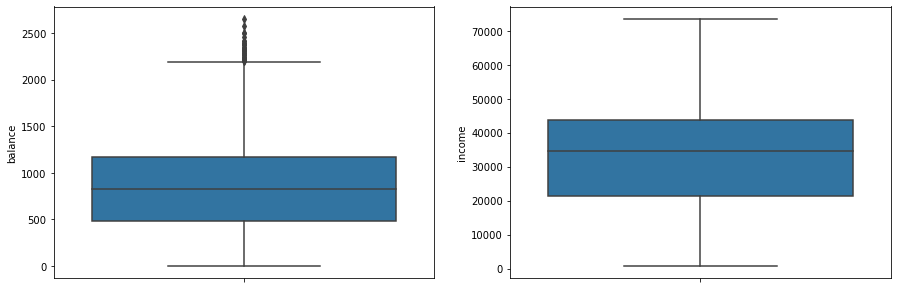

In [7]:
## plottting a box plot for numeric variables 'balance' and 'income'....

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y = default['balance'])
           
plt.subplot(1,2,2)
sns.boxplot(y = default['income'])           

           

<AxesSubplot:xlabel='default', ylabel='count'>

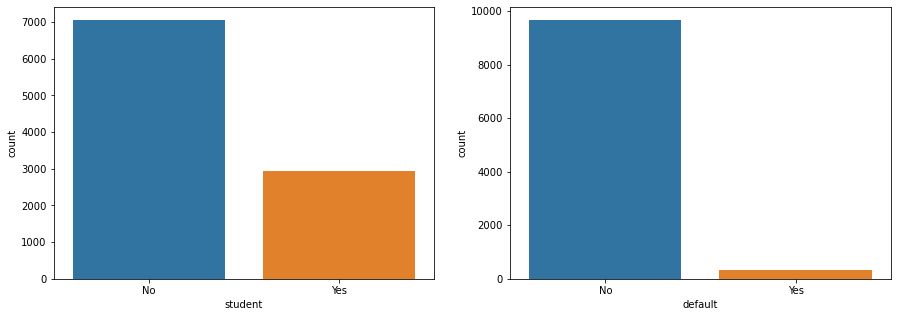

In [8]:
## plotting count plot for categorical variables 'student' and 'default'....

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(default['student'])

plt.subplot(1,2,2)
sns.countplot(default['default'])

In [9]:
## getting exact number of students and non students....
default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [10]:
## getting exact number of defaulters and non defaulters....
default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [11]:
## getting percentage of students and non students....
default['student'].value_counts(normalize = True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [12]:
## getting percentage  of defaulters and non defaulters....
default['default'].value_counts(normalize = True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

<AxesSubplot:xlabel='default', ylabel='income'>

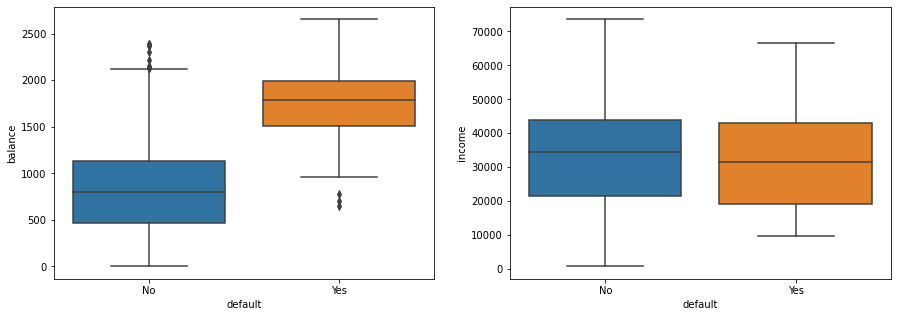

In [13]:
## plotting bivariate boxplot.... 

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(default['default'], default['balance'])

plt.subplot(1,2,2)
sns.boxplot(default['default'], default['income'])

In [14]:
## creating a crosstab for 'student' and 'default' columns....
pd.crosstab(default['student'], default['default'], normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


<AxesSubplot:>

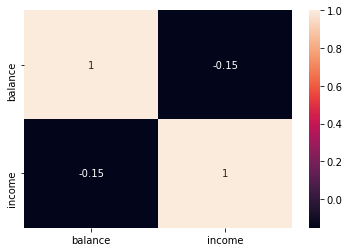

In [15]:
## creating a heatmap for 'income' and 'default' columns....
sns.heatmap(default[['balance','income']].corr(), annot = True)

In [16]:
## checking the presence of null values
default.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [17]:
##  calculating q1,q3,iqr,ul,ll
q1 ,q3 = default['balance'].quantile([.25,.75])
iqr = q3 - q1
upperlim= q3 +(1.5 * iqr)
lowerlim = q1 - (1.5 * iqr)

In [18]:
## upper limit...
upperlim

2193.1743093

In [19]:
## getting the outliers in a separate dataframe df
df = default[default['balance'] > 2193]
df.head()

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.49225
1136,Yes,No,2499.016750,51504.29396
1160,Yes,Yes,2502.684931,14947.51975
1359,Yes,No,2220.966201,40725.09621
1502,Yes,Yes,2332.878254,11770.23412


In [20]:
## getting the actual count of outliers ....
df['default'].count()

31

In [21]:
## getting the % of defaulters in outliers....
df['default'].value_counts(normalize = True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [22]:
## actual no of defaulters in outliers....
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [23]:
## outlier treatment....
default['balance'] = np.where(default['balance'] > upperlim,upperlim, default['balance'])

<AxesSubplot:ylabel='balance'>

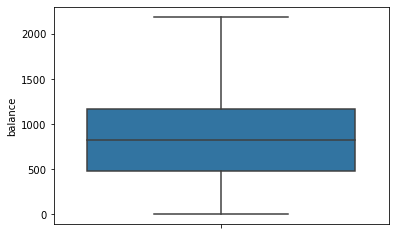

In [24]:
## plotting a boxplot to crosscheck outlier treatment.....
sns.boxplot(y = default['balance'])

In [25]:
## getting dummy variables for categorical columns....
default = pd.get_dummies(default, drop_first = True)
default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [26]:
## changing column names...
default.columns = ['balance','income','default','student']
default.head()

,balance,income,default,student
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [27]:
## importing model from sklearn...
from sklearn.model_selection import train_test_split

In [28]:
## labelling the data into dependent (y) and  independent variables(x)....
y = default['default']
x = default.drop('default',axis = 1)

In [29]:
## splitting the data into train and test sets.....
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 21, stratify = y)

In [30]:
## looking at the x_train and x_test data....
print(x_train.shape)
print(x_test.shape)

(7000, 3)
(3000, 3)


In [31]:
## looking at the y_train and y_test data....
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


In [33]:
## importing SMOTE from imblearn...
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 33 , sampling_strategy = 0.75)
#x_reset, y_reset = sm.fit_sample(x_train, y_train)

In [34]:
## importing logistic regression from sklearn ....
from sklearn.linear_model import LogisticRegression

In [35]:
##Creating an instance of logistic regression.... 
lr = LogisticRegression()
lr

LogisticRegression()

In [36]:
## fitting the data onto the logistic regression model....
lr.fit(x_train, y_train)

LogisticRegression()

In [38]:
## predicting the y
y_predicted = lr.predict(x_test)

In [40]:
## importing cofusion matrix from sklearn....
from sklearn.metrics import confusion_matrix , classification_report

In [41]:
## evaluating the prediction....
confusion_matrix(y_test,y_predicted)

array([[2889,   11],
       [  66,   34]], dtype=int64)

In [42]:
## calculating accuracy.....
(2889 + 34)/(2889+11+66+34)

0.9743333333333334